In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

# Make the size and fonts larger for this presentation
plt.rcParams['figure.figsize'] = (10, 8)
plt.rcParams['font.size'] = 16
plt.rcParams['lines.linewidth'] = 2

<a id=exercise_1></a>
# Exercise 1

Generate a line plot with the data of 3 random walks, corresponding to different random distributions.

With these characteristics:
* All lines in grey tones
* different markers or line types for each line
* with a legend located at the 'upper left'

**Hint:** Use the `np.cumsum` function to generate a random walk from a random sample.  

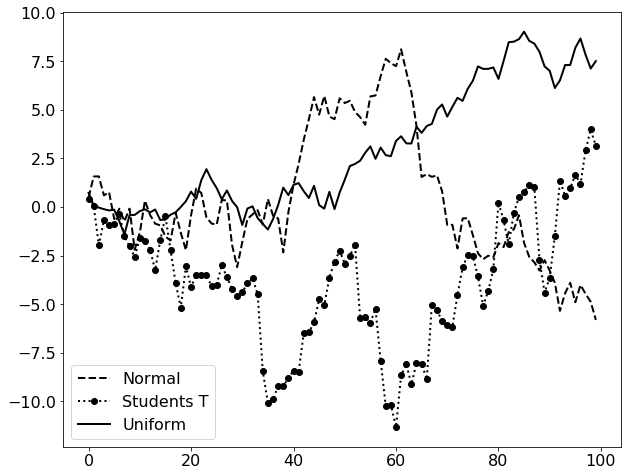

In [7]:
rw_1 = np.cumsum(np.random.normal(size=100), axis=0)
plt.plot(rw_1, '--k', label='Normal')

rw_2 = np.cumsum(np.random.standard_t(5, size=100), axis=0)
plt.plot(rw_2, ':ok', label='Students T')

rw_3 = np.cumsum(np.random.uniform(low=-1., high=1., size=100), axis=0)
plt.plot(rw_3, '-k', label='Uniform')

plt.legend(loc='lower left')

<a id=exercise_2></a>
## Exercise 2

Generate 3 differents random samples.

Plot them as normalized 1D histograms in a figure with 3 axes in 1 column, with shared x-axis and y-axis.

Put the name of the distribution somewhere in the axes so it can be identified.

There have to be no x-ticks in the top 2 axes and no vertical space between them.

Remove y-ticks.

/home/francesc/virtualenvs/python3_master_IFAE/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


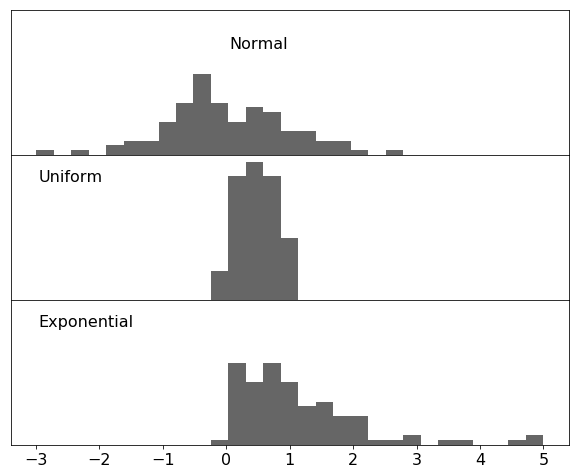

In [9]:
s1 = np.random.normal(size=100)
s2 = np.random.uniform(size=100)
s3 = np.random.exponential(size=100)

bins = np.linspace(-3, 5, 30)

fig, ((ax1), (ax2), (ax3)) = plt.subplots(3, 1, sharex=True, sharey=True, gridspec_kw={'hspace':0})
ax1.hist(s1, color='0.4', bins=bins, normed=True)
ax2.hist(s2, color='0.4', bins=bins, normed=True)
ax3.hist(s3, color='0.4', bins=bins, normed=True)

ax1.text(0.05, 0.9,'Normal', ha='left', va='top', transform=ax1.transAxes)
ax2.text(0.05, 0.9,'Uniform', ha='left', va='top', transform=ax2.transAxes)
ax3.text(0.05, 0.9,'Exponential', ha='left', va='top', transform=ax3.transAxes)
for ax in fig.get_axes():
    ax.set_yticks([])

<a id=exercise_3></a>
# Exercise 3

Load the file `resources/nip.fits` using fits.
```
hdul = fits.open('resources/nip.fits')
```

Plot the matrix in `hdul[1].data` with imshow. You won't see much.

Do a histogram (Hint: use the `log` argument) to analyze the values in the matrix.

Use imshow (with `norm`) to see what's inside the plot.

Use `imshow` + `clim` to see a higher detail of the background.

Put everything in a single figure mith multiple axes

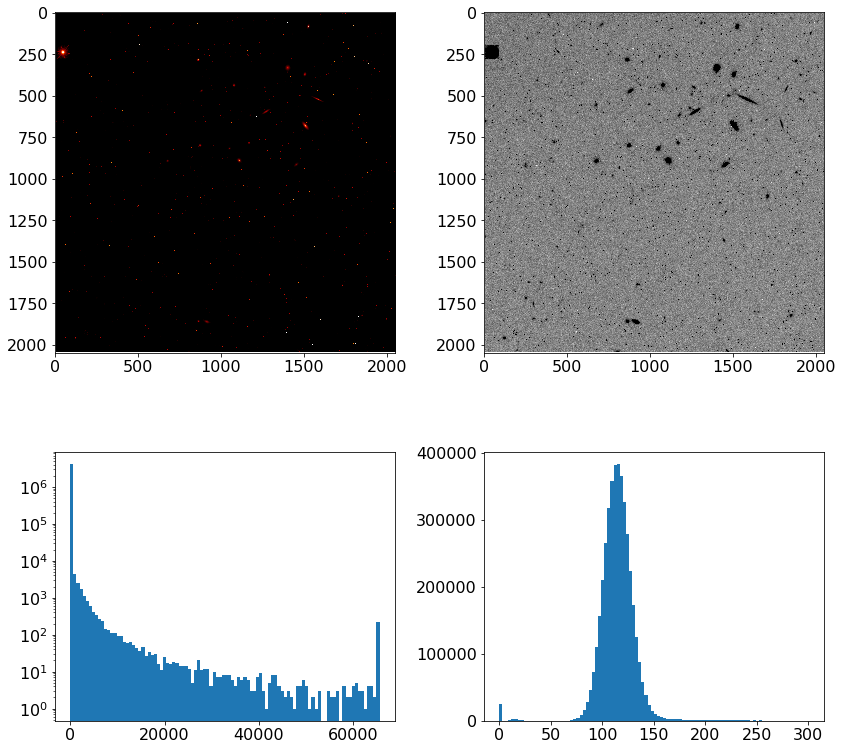

In [12]:
from astropy.io import fits
import matplotlib.gridspec as gridspec
from matplotlib.colors import LogNorm

hdul = fits.open('resources/nip.fits')

fig = plt.figure(figsize=(12., 12.))

gs = gridspec.GridSpec(3, 4, hspace=0.)

ax1 = fig.add_subplot(gs[:2, :2])
ax1.imshow(hdul[1].data, clim=(200, 66000), norm=LogNorm(), cmap='gist_heat')

ax2 = fig.add_subplot(gs[:2, 2:])
im2 = ax2.imshow(hdul[1].data, clim=(0, 200), cmap='Greys')

ax3 = fig.add_subplot(gs[2, :2])
ax3.hist(hdul[1].data.flatten(), bins=100, log=True);

ax4 = fig.add_subplot(gs[2, 2:])
ax4.hist(hdul[1].data.flatten(), bins=100, range=(0, 300));

plt.tight_layout()